In [ ]:
import numpy as np
import pandas as pd
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle

In [ ]:
ticker = 'MSFT'
period1 = int(time.mktime(datetime.datetime(2010, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 1, 10, 23, 59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.904980,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.912703,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.765955,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.518799,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.680994,51197400
...,...,...,...,...,...,...,...
3022,2022-01-04,334.829987,335.200012,326.119995,329.010010,329.010010,32674300
3023,2022-01-05,325.859985,326.070007,315.980011,316.380005,316.380005,40054300
3024,2022-01-06,313.149994,318.700012,311.489990,313.880005,313.880005,39646100
3025,2022-01-07,314.149994,316.500000,310.089996,314.040009,314.040009,32674000


In [ ]:
data['highest hight'] = data['High'].rolling(window=10).max()
data['lowest low'] = data['Low'].rolling(window=10).min()

In [ ]:
data['trigger'] = np.where(data['High']==data['highest hight'],1,np.nan)
data['trigger'] = np.where(data['Low']==data['lowest low'],0,data['trigger'])

In [ ]:
data['position'] = data['trigger'].ffill().fillna(-1)
data

,Date,Open,High,Low,Close,Adj Close,Volume,highest hight,lowest low,trigger,position
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.904980,38409100,NaN,NaN,NaN,-1.0
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.912703,49749600,NaN,NaN,NaN,-1.0
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.765955,58182400,NaN,NaN,NaN,-1.0
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.518799,50559700,NaN,NaN,NaN,-1.0
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.680994,51197400,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
3022,2022-01-04,334.829987,335.200012,326.119995,329.010010,329.010010,32674300,344.299988,319.799988,NaN,1.0
3023,2022-01-05,325.859985,326.070007,315.980011,316.380005,316.380005,40054300,344.299988,315.980011,0.0,0.0
3024,2022-01-06,313.149994,318.700012,311.489990,313.880005,313.880005,39646100,344.299988,311.489990,0.0,0.0
3025,2022-01-07,314.149994,316.500000,310.089996,314.040009,314.040009,32674000,344.299988,310.089996,0.0,0.0


In [ ]:
data=data.drop(data.index[[0,1,2,3,4,5,6,7,8,9]])

# Random Forest Classifier


In [ ]:
df = data.drop(['Date','Adj Close','Volume','highest hight', 'lowest low', 'trigger'],axis=1)

In [ ]:
df.describe()

,Open,High,Low,Close,position
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,86.701531,87.498956,85.879669,86.740232,0.619158
std,76.911667,77.634559,76.170620,76.959579,0.485674
min,23.090000,23.320000,22.730000,23.010000,0.000000
25%,30.950001,31.190001,30.680000,30.980000,0.000000
50%,51.730000,52.130001,51.070000,51.639999,1.000000
75%,110.889999,111.589996,109.550003,110.970001,1.000000
max,344.619995,349.670013,342.200012,343.109985,1.000000


In [ ]:
X = df.drop('position',axis=1)

In [ ]:
y = df['position']

In [ ]:
X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=101)

In [ ]:
modelo = RandomForestClassifier()
modelo.fit(X_train,y_train)
modelo.score(X_test,y_test)

0.6837748344370861

In [ ]:
while True:
  modelo = RandomForestClassifier()
  modelo.fit(X_train,y_train)
  print(modelo.score(X_test,y_test))
  if modelo.score(X_test,y_test)>0.689:
    break
modelo.score(X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58       228
         1.0       0.75      0.76      0.76       376

    accuracy                           0.69       604
   macro avg       0.67      0.67      0.67       604
weighted avg       0.69      0.69      0.69       604



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1800x1200 with 0 Axes>

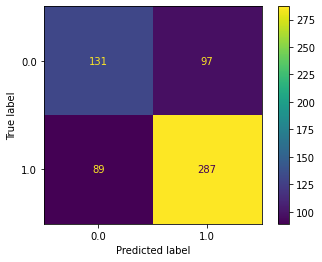

<Figure size 1800x1200 with 0 Axes>

In [ ]:
pred_modelo = modelo.predict(X_test)
print(classification_report(y_test,pred_modelo))
plot_confusion_matrix(modelo,X_test,y_test)
plt.figure(figsize=(12,8),dpi=150)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


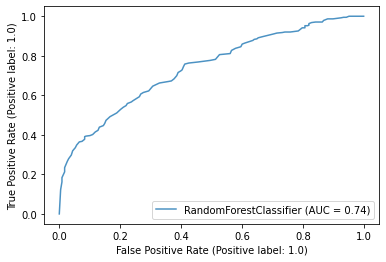

In [ ]:
rfc_disp = plot_roc_curve(modelo, X_test, y_test, alpha = 0.8)
plt.show()

In [ ]:
pkl_filename = "Microsoft.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelo, file)

In [ ]:
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [ ]:
x_in = np.asarray([320.47,320.88,304.00,304.79]).reshape(1,-1)
predicts = modelo.predict(x_in)
predicts[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.0

### Fuentes

### https://youtu.be/p_m0UhPubXc
### https://youtu.be/ErvHQ5s74FA
### https://youtu.be/vibDbEBnyV4
